In [3]:
import os
import pandas as pd
import chardet
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.patches as patches

In [13]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, "Data")

combined_df_2022 = pd.read_csv(os.path.join(data_dir,'2022_load.csv'), index_col=0)
df_weather_cleaned_2022 = pd.read_csv(os.path.join(data_dir,'weather2022.csv'), index_col=0)
combined_df_2023 = pd.read_csv(os.path.join(data_dir,'2023_load.csv'), index_col='datetime')
df_weather_cleaned_2023 = pd.read_csv(os.path.join(data_dir,'weather2023.csv'), encoding="cp949", index_col=0 )
combined_df_true = pd.read_csv(os.path.join(data_dir,'combined_df_true.csv'), index_col=0)

# 2022년 데이터를 활용한 모델 학습

In [14]:
def create_dataset(data, look_back=60, predict_hours=24):
    X, y = [], []
    for i in range(len(data) - look_back * 24 - predict_hours + 1):
        X.append(data[i:i + look_back * 24])
        y.append(data[i + look_back * 24:i + look_back * 24 + predict_hours, -1])
    return np.array(X), np.array(y)

models_7, models_15, models_30, models_60 = {}, {}, {}, {}

empty_models = {
    7: models_7, 
    15: models_15, 
    30: models_30, 
    60: models_60
}

for key, model_dict in empty_models.items():
    for building_name in combined_df_2022.columns:

        look_back = key

        merged_data = df_weather_cleaned_2022.join(combined_df_2022[building_name], how='inner')

        columns = [building_name] + [col for col in merged_data.columns if col != building_name]
        merged_data = merged_data.reindex(columns=columns)

        selected_features = ['기온(°C)','지면온도(°C)','습도(%)']

        selected_df = merged_data[selected_features + [building_name]]

        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(selected_df)

        predict_hours = 24
        X, y = create_dataset(scaled_data, look_back, predict_hours)

        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(look_back * 24, X.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(50))
        model.add(Dropout(0.2))
        model.add(Dense(predict_hours))

        model.compile(optimizer='adam', loss='mean_squared_error')

        history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

        model_dict[building_name] = model

Epoch 1/30


c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.1481 - val_loss: 0.0312
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0555 - val_loss: 0.0299
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0475 - val_loss: 0.0265
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0384 - val_loss: 0.0186
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0305 - val_loss: 0.0149
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0257 - val_loss: 0.0151
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0238 - val_loss: 0.0161
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0214 - val_loss: 0.0150
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0206 - val_loss: 0.0140
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0195 - val_loss: 0.0137
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0184 - val_loss: 0.0141
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0181 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1771 - val_loss: 0.0348
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0564 - val_loss: 0.0316
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0461 - val_loss: 0.0311
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0418 - val_loss: 0.0268
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0342 - val_loss: 0.0191
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0269 - val_loss: 0.0158
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0232 - val_loss: 0.0170
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0220 - val_loss: 0.0144
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0201 - val_loss: 0.0168
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0194 - val_loss: 0.0143
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0186 - val_loss: 0.0148
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0175 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.2056 - val_loss: 0.0264
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0484 - val_loss: 0.0245
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0393 - val_loss: 0.0239
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0357 - val_loss: 0.0230
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0324 - val_loss: 0.0216
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0289 - val_loss: 0.0187
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0254 - val_loss: 0.0168
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0234 - val_loss: 0.0156
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0207 - val_loss: 0.0152
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0209 - val_loss: 0.0146
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0201 - val_loss: 0.0147
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0187 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1028 - val_loss: 0.0373
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0525 - val_loss: 0.0332
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0433 - val_loss: 0.0216
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0318 - val_loss: 0.0190
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0280 - val_loss: 0.0167
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0261 - val_loss: 0.0178
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0242 - val_loss: 0.0146
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0222 - val_loss: 0.0149
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0210 - val_loss: 0.0152
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0209 - val_loss: 0.0143
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0200 - val_loss: 0.0145
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0188 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.1824 - val_loss: 0.0298
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0584 - val_loss: 0.0285
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0512 - val_loss: 0.0274
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0482 - val_loss: 0.0240
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0388 - val_loss: 0.0178
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0280 - val_loss: 0.0145
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0251 - val_loss: 0.0152
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0237 - val_loss: 0.0150
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0218 - val_loss: 0.0156
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0221 - val_loss: 0.0139
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0206 - val_loss: 0.0138
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0208 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1392 - val_loss: 0.0381
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0486 - val_loss: 0.0322
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0414 - val_loss: 0.0301
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0386 - val_loss: 0.0283
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0361 - val_loss: 0.0262
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0308 - val_loss: 0.0198
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0270 - val_loss: 0.0201
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0258 - val_loss: 0.0179
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0251 - val_loss: 0.0201
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0243 - val_loss: 0.0192
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0241 - val_loss: 0.0178
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0235 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0499 - val_loss: 0.0262
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0273 - val_loss: 0.0229
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0238 - val_loss: 0.0178
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0192 - val_loss: 0.0180
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0178 - val_loss: 0.0152
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0148 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0988 - val_loss: 0.0246
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0318 - val_loss: 0.0246
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0267 - val_loss: 0.0240
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0251 - val_loss: 0.0242
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0240 - val_loss: 0.0246
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0228 - val_loss: 0.0238
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0214 - val_loss: 0.0235
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0210 - val_loss: 0.0229
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0192 - val_loss: 0.0215
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0193 - val_loss: 0.0214
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0188 - val_loss: 0.0221
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0185 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1092 - val_loss: 0.0315
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0448 - val_loss: 0.0295
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0391 - val_loss: 0.0282
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0357 - val_loss: 0.0247
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0310 - val_loss: 0.0209
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0285 - val_loss: 0.0202
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0268 - val_loss: 0.0186
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0254 - val_loss: 0.0173
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0233 - val_loss: 0.0154
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0216 - val_loss: 0.0146
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0196 - val_loss: 0.0141
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0189 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1302 - val_loss: 0.0316
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0423 - val_loss: 0.0309
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0374 - val_loss: 0.0318
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0351 - val_loss: 0.0294
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0327 - val_loss: 0.0275
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0287 - val_loss: 0.0241
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0244 - val_loss: 0.0201
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0223 - val_loss: 0.0194
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0209 - val_loss: 0.0199
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0197 - val_loss: 0.0188
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0194 - val_loss: 0.0191
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0183 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1384 - val_loss: 0.0421
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0484 - val_loss: 0.0380
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0429 - val_loss: 0.0391
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0388 - val_loss: 0.0303
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0311 - val_loss: 0.0215
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0267 - val_loss: 0.0177
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0224 - val_loss: 0.0178
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0201 - val_loss: 0.0171
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0193 - val_loss: 0.0157
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0180 - val_loss: 0.0166
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0172 - val_loss: 0.0148
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0166 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1367 - val_loss: 0.0350
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0480 - val_loss: 0.0320
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0419 - val_loss: 0.0281
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0333 - val_loss: 0.0201
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0254 - val_loss: 0.0153
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0232 - val_loss: 0.0146
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0214 - val_loss: 0.0141
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0196 - val_loss: 0.0163
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0201 - val_loss: 0.0143
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0189 - val_loss: 0.0131
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0178 - val_loss: 0.0133
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0166 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1781 - val_loss: 0.0577
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0512 - val_loss: 0.0538
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0419 - val_loss: 0.0483
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0343 - val_loss: 0.0292
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0242 - val_loss: 0.0274
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0211 - val_loss: 0.0244
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0211 - val_loss: 0.0255
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0187 - val_loss: 0.0231
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0175 - val_loss: 0.0254
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0167 - val_loss: 0.0226
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0169 - val_loss: 0.0236
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0162 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1516 - val_loss: 0.0622
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0854 - val_loss: 0.0500
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0602 - val_loss: 0.0269
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0374 - val_loss: 0.0229
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0312 - val_loss: 0.0221
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0294 - val_loss: 0.0209
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0279 - val_loss: 0.0207
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0266 - val_loss: 0.0208
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0253 - val_loss: 0.0196
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0243 - val_loss: 0.0193
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0236 - val_loss: 0.0184
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0224 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1317 - val_loss: 0.0319
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0508 - val_loss: 0.0256
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0424 - val_loss: 0.0228
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0352 - val_loss: 0.0184
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0277 - val_loss: 0.0157
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0243 - val_loss: 0.0144
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0235 - val_loss: 0.0134
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0211 - val_loss: 0.0127
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0195 - val_loss: 0.0116
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0180 - val_loss: 0.0106
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0173 - val_loss: 0.0104
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0161 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1106 - val_loss: 0.0259
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0394 - val_loss: 0.0251
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0335 - val_loss: 0.0244
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0305 - val_loss: 0.0178
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0242 - val_loss: 0.0166
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0225 - val_loss: 0.0177
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0209 - val_loss: 0.0172
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0204 - val_loss: 0.0150
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0185 - val_loss: 0.0185
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0185 - val_loss: 0.0127
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0154 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2618 - val_loss: 0.0263
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0440 - val_loss: 0.0257
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0358 - val_loss: 0.0256
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0323 - val_loss: 0.0251
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0293 - val_loss: 0.0247
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0269 - val_loss: 0.0250
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0240 - val_loss: 0.0238
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0235 - val_loss: 0.0238
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0218 - val_loss: 0.0226
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0200 - val_loss: 0.0219
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0198 - val_loss: 0.0207
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0188 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0813 - val_loss: 0.0504
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0485 - val_loss: 0.0443
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0415 - val_loss: 0.0306
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0281 - val_loss: 0.0270
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0258 - val_loss: 0.0263
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0247 - val_loss: 0.0268
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0236 - val_loss: 0.0247
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0212 - val_loss: 0.0270
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0193 - val_loss: 0.0363
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0177 - val_loss: 0.0323
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0164 - val_loss: 0.0304
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0157 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1446 - val_loss: 0.0305
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0481 - val_loss: 0.0279
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0416 - val_loss: 0.0247
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0365 - val_loss: 0.0206
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0277 - val_loss: 0.0120
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0228 - val_loss: 0.0111
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0203 - val_loss: 0.0104
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0200 - val_loss: 0.0098
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0188 - val_loss: 0.0096
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0175 - val_loss: 0.0101
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0168 - val_loss: 0.0096
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0167 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0923 - val_loss: 0.0730
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0663 - val_loss: 0.0553
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0470 - val_loss: 0.0431
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0391 - val_loss: 0.0418
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0350 - val_loss: 0.0390
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0336 - val_loss: 0.0380
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0320 - val_loss: 0.0382
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0303 - val_loss: 0.0354
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0289 - val_loss: 0.0352
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0289 - val_loss: 0.0352
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0279 - val_loss: 0.0350
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0275 - val_l

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.1697 - val_loss: 0.0344
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0579 - val_loss: 0.0311
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0491 - val_loss: 0.0292
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0445 - val_loss: 0.0234
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0349 - val_loss: 0.0170
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0270 - val_loss: 0.0146
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0261 - val_loss: 0.0155
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0239 - val_loss: 0.0146
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0219 - val_loss: 0.0144
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0213 - val_loss: 0.0147
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0193 - val_loss: 0.0141
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.1913 - val_loss: 0.0405
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0561 - val_loss: 0.0363
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0474 - val_loss: 0.0324
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0447 - val_loss: 0.0289
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0394 - val_loss: 0.0250
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0310 - val_loss: 0.0173
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0261 - val_loss: 0.0149
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0233 - val_loss: 0.0143
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0206 - val_loss: 0.0149
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0207 - val_loss: 0.0150
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0199 - val_loss: 0.0144
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.1849 - val_loss: 0.0284
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0466 - val_loss: 0.0257
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0390 - val_loss: 0.0246
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0352 - val_loss: 0.0235
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0324 - val_loss: 0.0219
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0276 - val_loss: 0.0182
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0253 - val_loss: 0.0164
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0233 - val_loss: 0.0151
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0215 - val_loss: 0.0158
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0208 - val_loss: 0.0150
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0199 - val_loss: 0.0153
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0944 - val_loss: 0.0413
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0526 - val_loss: 0.0371
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0444 - val_loss: 0.0277
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0347 - val_loss: 0.0191
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0280 - val_loss: 0.0175
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0257 - val_loss: 0.0159
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0242 - val_loss: 0.0142
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0225 - val_loss: 0.0146
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0208 - val_loss: 0.0158
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0202 - val_loss: 0.0141
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0192 - val_loss: 0.0149
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.1674 - val_loss: 0.0265
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0531 - val_loss: 0.0244
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0479 - val_loss: 0.0239
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0443 - val_loss: 0.0214
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0382 - val_loss: 0.0177
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0288 - val_loss: 0.0131
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0262 - val_loss: 0.0129
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0233 - val_loss: 0.0136
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0221 - val_loss: 0.0174
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0218 - val_loss: 0.0128
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0208 - val_loss: 0.0143
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.1362 - val_loss: 0.0368
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0448 - val_loss: 0.0355
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0403 - val_loss: 0.0373
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0374 - val_loss: 0.0343
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0365 - val_loss: 0.0319
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0322 - val_loss: 0.0293
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0287 - val_loss: 0.0220
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0270 - val_loss: 0.0196
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0248 - val_loss: 0.0196
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0244 - val_loss: 0.0200
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0236 - val_loss: 0.0196
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0495 - val_loss: 0.0295
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0288 - val_loss: 0.0279
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0250 - val_loss: 0.0249
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0214 - val_loss: 0.0189
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0192 - val_loss: 0.0185
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0172 - val_loss: 0.0169
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0173 - val_loss: 0.0179
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0157 - val_loss: 0.0173
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0152 - val_loss: 0.0164
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0151 - val_loss: 0.0160
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0150 - val_loss: 0.0164
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.1264 - val_loss: 0.0268
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0358 - val_loss: 0.0258
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0310 - val_loss: 0.0261
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0288 - val_loss: 0.0259
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0252 - val_loss: 0.0258
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0251 - val_loss: 0.0261
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0236 - val_loss: 0.0255
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0224 - val_loss: 0.0252
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0217 - val_loss: 0.0250
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0207 - val_loss: 0.0242
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0212 - val_loss: 0.0242
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.1214 - val_loss: 0.0322
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0476 - val_loss: 0.0305
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0410 - val_loss: 0.0297
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0381 - val_loss: 0.0283
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0361 - val_loss: 0.0254
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0321 - val_loss: 0.0222
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0290 - val_loss: 0.0212
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0262 - val_loss: 0.0202
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0248 - val_loss: 0.0183
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0225 - val_loss: 0.0162
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0210 - val_loss: 0.0160
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.1676 - val_loss: 0.0385
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0476 - val_loss: 0.0345
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0367 - val_loss: 0.0345
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0340 - val_loss: 0.0319
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0303 - val_loss: 0.0292
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0262 - val_loss: 0.0216
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0240 - val_loss: 0.0233
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0216 - val_loss: 0.0227
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0189 - val_loss: 0.0203
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0189 - val_loss: 0.0204
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.1329 - val_loss: 0.0460
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0485 - val_loss: 0.0413
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0399 - val_loss: 0.0393
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0347 - val_loss: 0.0301
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0278 - val_loss: 0.0199
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0233 - val_loss: 0.0212
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0210 - val_loss: 0.0160
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0195 - val_loss: 0.0162
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0180 - val_loss: 0.0144
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0171 - val_loss: 0.0157
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.1394 - val_loss: 0.0395
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0473 - val_loss: 0.0355
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0392 - val_loss: 0.0333
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0361 - val_loss: 0.0300
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0285 - val_loss: 0.0239
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0244 - val_loss: 0.0187
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0211 - val_loss: 0.0174
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0189 - val_loss: 0.0156
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0194 - val_loss: 0.0147
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0168 - val_loss: 0.0146
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0163 - val_loss: 0.0149
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.1916 - val_loss: 0.0603
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0558 - val_loss: 0.0593
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0447 - val_loss: 0.0602
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0400 - val_loss: 0.0482
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0316 - val_loss: 0.0368
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0241 - val_loss: 0.0316
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0209 - val_loss: 0.0278
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0199 - val_loss: 0.0294
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0184 - val_loss: 0.0243
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0179 - val_loss: 0.0261
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0172 - val_loss: 0.0271
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.1677 - val_loss: 0.0653
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0867 - val_loss: 0.0558
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0672 - val_loss: 0.0295
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0387 - val_loss: 0.0218
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0323 - val_loss: 0.0197
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0293 - val_loss: 0.0190
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0277 - val_loss: 0.0201
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0279 - val_loss: 0.0221
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0277 - val_loss: 0.0197
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0269 - val_loss: 0.0192
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0244 - val_loss: 0.0188
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.1391 - val_loss: 0.0319
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0478 - val_loss: 0.0247
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0405 - val_loss: 0.0215
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0338 - val_loss: 0.0180
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0265 - val_loss: 0.0161
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0244 - val_loss: 0.0150
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0222 - val_loss: 0.0171
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0218 - val_loss: 0.0143
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0203 - val_loss: 0.0132
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0179 - val_loss: 0.0120
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0167 - val_loss: 0.0122
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.1129 - val_loss: 0.0259
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0392 - val_loss: 0.0256
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0343 - val_loss: 0.0208
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0322 - val_loss: 0.0211
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0262 - val_loss: 0.0161
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0234 - val_loss: 0.0175
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0228 - val_loss: 0.0190
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0213 - val_loss: 0.0129
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0197 - val_loss: 0.0119
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0194 - val_loss: 0.0108
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0195 - val_loss: 0.0133
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.3069 - val_loss: 0.0288
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0521 - val_loss: 0.0269
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0385 - val_loss: 0.0268
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0342 - val_loss: 0.0267
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0312 - val_loss: 0.0261
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0292 - val_loss: 0.0256
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0269 - val_loss: 0.0254
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0261 - val_loss: 0.0249
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0242 - val_loss: 0.0248
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0232 - val_loss: 0.0241
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0223 - val_loss: 0.0239
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0806 - val_loss: 0.0539
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0426 - val_loss: 0.0486
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0394 - val_loss: 0.0386
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0301 - val_loss: 0.0298
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0248 - val_loss: 0.0265
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0223 - val_loss: 0.0259
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0208 - val_loss: 0.0286
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0204 - val_loss: 0.0267
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0178 - val_loss: 0.0280
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0165 - val_loss: 0.0299
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0145 - val_loss: 0.0279
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.1553 - val_loss: 0.0343
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0526 - val_loss: 0.0295
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0418 - val_loss: 0.0218
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0339 - val_loss: 0.0147
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0252 - val_loss: 0.0115
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0232 - val_loss: 0.0107
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0222 - val_loss: 0.0101
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0189 - val_loss: 0.0098
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0178 - val_loss: 0.0092
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0171 - val_loss: 0.0101
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0166 - val_loss: 0.0089
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0823 - val_loss: 0.0703
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0657 - val_loss: 0.0579
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0492 - val_loss: 0.0463
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0401 - val_loss: 0.0434
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0350 - val_loss: 0.0419
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0323 - val_loss: 0.0439
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0315 - val_loss: 0.0399
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0301 - val_loss: 0.0410
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0286 - val_loss: 0.0418
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0269 - val_loss: 0.0452
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0256 - val_loss: 0.0428
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - loss: 0.1952 - val_loss: 0.0330
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0636 - val_loss: 0.0312
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0534 - val_loss: 0.0316
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0493 - val_loss: 0.0295
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0457 - val_loss: 0.0247
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0403 - val_loss: 0.0205
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0316 - val_loss: 0.0197
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0284 - val_loss: 0.0166
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0259 - val_loss: 0.0197
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.0251 - val_loss: 0.0166
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0246 - val_loss: 0.0164
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.2218 - val_loss: 0.0488
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0742 - val_loss: 0.0422
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0550 - val_loss: 0.0375
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0496 - val_loss: 0.0328
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0450 - val_loss: 0.0351
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0410 - val_loss: 0.0274
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0343 - val_loss: 0.0254
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0310 - val_loss: 0.0206
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0274 - val_loss: 0.0226
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0246 - val_loss: 0.0168
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0247 - val_loss: 0.0178
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - loss: 0.2364 - val_loss: 0.0296
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0618 - val_loss: 0.0243
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0479 - val_loss: 0.0232
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0438 - val_loss: 0.0230
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0408 - val_loss: 0.0224
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0377 - val_loss: 0.0216
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0338 - val_loss: 0.0212
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0277 - val_loss: 0.0186
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0252 - val_loss: 0.0178
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0236 - val_loss: 0.0181
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0229 - val_loss: 0.0190
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 0.1032 - val_loss: 0.0325
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.0572 - val_loss: 0.0306
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0540 - val_loss: 0.0300
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0485 - val_loss: 0.0274
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0412 - val_loss: 0.0243
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0338 - val_loss: 0.0190
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0285 - val_loss: 0.0206
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - loss: 0.0267 - val_loss: 0.0173
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0269 - val_loss: 0.0174
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.0254 - val_loss: 0.0191
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 0.0232 - val_loss: 0.0189
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - loss: 0.1892 - val_loss: 0.0259
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0643 - val_loss: 0.0249
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0527 - val_loss: 0.0223
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0467 - val_loss: 0.0197
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0423 - val_loss: 0.0200
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0360 - val_loss: 0.0195
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0298 - val_loss: 0.0186
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0271 - val_loss: 0.0159
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0254 - val_loss: 0.0165
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0234 - val_loss: 0.0171
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0226 - val_loss: 0.0215
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.1697 - val_loss: 0.0378
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - loss: 0.0534 - val_loss: 0.0322
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0451 - val_loss: 0.0295
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0427 - val_loss: 0.0287
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0403 - val_loss: 0.0276
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0404 - val_loss: 0.0287
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0377 - val_loss: 0.0253
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - loss: 0.0368 - val_loss: 0.0246
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0349 - val_loss: 0.0233
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0317 - val_loss: 0.0207
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0281 - val_loss: 0.0198
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.0516 - val_loss: 0.0339
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0302 - val_loss: 0.0318
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0282 - val_loss: 0.0293
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0254 - val_loss: 0.0284
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0230 - val_loss: 0.0260
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0221 - val_loss: 0.0234
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0201 - val_loss: 0.0219
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0179 - val_loss: 0.0197
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0167 - val_loss: 0.0193
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0154 - val_loss: 0.0187
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0153 - val_loss: 0.0193
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - loss: 0.1268 - val_loss: 0.0340
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0346 - val_loss: 0.0316
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0301 - val_loss: 0.0329
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0258 - val_loss: 0.0327
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0248 - val_loss: 0.0328
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0234 - val_loss: 0.0331
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0243 - val_loss: 0.0326
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0222 - val_loss: 0.0328
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0211 - val_loss: 0.0330
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0201 - val_loss: 0.0333
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0209 - val_loss: 0.0338
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - loss: 0.1595 - val_loss: 0.0292
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0525 - val_loss: 0.0277
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0467 - val_loss: 0.0272
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0431 - val_loss: 0.0278
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0411 - val_loss: 0.0270
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0384 - val_loss: 0.0267
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0370 - val_loss: 0.0252
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0352 - val_loss: 0.0231
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0314 - val_loss: 0.0220
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0293 - val_loss: 0.0213
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0281 - val_loss: 0.0224
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.2018 - val_loss: 0.0291
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0585 - val_loss: 0.0266
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0488 - val_loss: 0.0257
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0442 - val_loss: 0.0255
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0418 - val_loss: 0.0258
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0391 - val_loss: 0.0254
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0373 - val_loss: 0.0279
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0360 - val_loss: 0.0262
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0327 - val_loss: 0.0260
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0291 - val_loss: 0.0242
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0268 - val_loss: 0.0241
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 0.2042 - val_loss: 0.0388
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0644 - val_loss: 0.0391
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0541 - val_loss: 0.0356
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0497 - val_loss: 0.0359
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0452 - val_loss: 0.0317
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0402 - val_loss: 0.0270
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0331 - val_loss: 0.0226
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0268 - val_loss: 0.0229
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0252 - val_loss: 0.0204
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0239 - val_loss: 0.0247
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0220 - val_loss: 0.0230
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - loss: 0.1946 - val_loss: 0.0448
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0579 - val_loss: 0.0392
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0460 - val_loss: 0.0385
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0424 - val_loss: 0.0361
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0400 - val_loss: 0.0358
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0361 - val_loss: 0.0314
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0349 - val_loss: 0.0316
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0292 - val_loss: 0.0292
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0275 - val_loss: 0.0222
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0243 - val_loss: 0.0206
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0213 - val_loss: 0.0209
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.2667 - val_loss: 0.0720
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0733 - val_loss: 0.0668
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0548 - val_loss: 0.0641
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0466 - val_loss: 0.0618
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0421 - val_loss: 0.0585
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0374 - val_loss: 0.0444
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0284 - val_loss: 0.0364
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0236 - val_loss: 0.0346
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0223 - val_loss: 0.0327
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0196 - val_loss: 0.0336
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0197 - val_loss: 0.0320
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 0.1801 - val_loss: 0.0576
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0945 - val_loss: 0.0523
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0788 - val_loss: 0.0407
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0610 - val_loss: 0.0218
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0421 - val_loss: 0.0189
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - loss: 0.0357 - val_loss: 0.0186
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0343 - val_loss: 0.0177
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0314 - val_loss: 0.0179
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0312 - val_loss: 0.0177
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0300 - val_loss: 0.0177
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0293 - val_loss: 0.0181
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.2165 - val_loss: 0.0521
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0651 - val_loss: 0.0365
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0521 - val_loss: 0.0321
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0486 - val_loss: 0.0311
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0451 - val_loss: 0.0251
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.0415 - val_loss: 0.0248
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0382 - val_loss: 0.0230
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0331 - val_loss: 0.0225
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0286 - val_loss: 0.0179
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0263 - val_loss: 0.0161
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0248 - val_loss: 0.0164
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 0.1507 - val_loss: 0.0207
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0490 - val_loss: 0.0158
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0421 - val_loss: 0.0164
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0369 - val_loss: 0.0152
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0359 - val_loss: 0.0148
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0338 - val_loss: 0.0145
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0323 - val_loss: 0.0139
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0297 - val_loss: 0.0126
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0275 - val_loss: 0.0125
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0257 - val_loss: 0.0118
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0240 - val_loss: 0.0112
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.3557 - val_loss: 0.0501
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0744 - val_loss: 0.0324
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0501 - val_loss: 0.0323
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0425 - val_loss: 0.0319
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0358 - val_loss: 0.0307
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0338 - val_loss: 0.0314
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.0316 - val_loss: 0.0306
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0295 - val_loss: 0.0305
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - loss: 0.0287 - val_loss: 0.0304
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - loss: 0.0270 - val_loss: 0.0303
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - loss: 0.0263 - val_loss: 0.0303
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - loss: 0.0955 - val_loss: 0.0605
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0527 - val_loss: 0.0573
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0460 - val_loss: 0.0538
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0435 - val_loss: 0.0484
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0359 - val_loss: 0.0357
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0300 - val_loss: 0.0311
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0268 - val_loss: 0.0329
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0247 - val_loss: 0.0297
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0237 - val_loss: 0.0294
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - loss: 0.0226 - val_loss: 0.0298
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.2024 - val_loss: 0.0403
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0545 - val_loss: 0.0351
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0451 - val_loss: 0.0331
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0398 - val_loss: 0.0326
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0382 - val_loss: 0.0274
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.0362 - val_loss: 0.0275
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0324 - val_loss: 0.0258
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0305 - val_loss: 0.0205
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0255 - val_loss: 0.0162
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - loss: 0.0218 - val_loss: 0.0172
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - loss: 0.0193 - val_loss: 0.0182
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0902 - val_loss: 0.0845
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0696 - val_loss: 0.0751
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0589 - val_loss: 0.0583
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0477 - val_loss: 0.0595
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0410 - val_loss: 0.0520
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.0354 - val_loss: 0.0563
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0335 - val_loss: 0.0522
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0303 - val_loss: 0.0575
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0288 - val_loss: 0.0506
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0304 - val_loss: 0.0530
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0278 - val_loss: 0.0567
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1779 - val_loss: 0.1135
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - loss: 0.1621 - val_loss: 0.1025
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 0.1504 - val_loss: 0.0924
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.1400 - val_loss: 0.0829
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1275 - val_loss: 0.0740
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - loss: 0.1206 - val_loss: 0.0660
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.1059 - val_loss: 0.0591
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.0965 - val_loss: 0.0538
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.0925 - val_loss: 0.0504
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.0778 - val_loss: 0.0475
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.0704 - val_loss: 0.0446
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0720 - val_loss: 0.0409
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1662 - val_loss: 0.1226
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.1526 - val_loss: 0.1089
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - loss: 0.1389 - val_loss: 0.0966
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 0.1253 - val_loss: 0.0851
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.1118 - val_loss: 0.0744
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.1067 - val_loss: 0.0644
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.0921 - val_loss: 0.0552
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0825 - val_loss: 0.0473
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0696 - val_loss: 0.0412
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.0636 - val_loss: 0.0370
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0558 - val_loss: 0.0345
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 0.0546 - val_loss: 0.0322
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3136 - val_loss: 0.2296
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.2925 - val_loss: 0.2096
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.2698 - val_loss: 0.1909
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.2497 - val_loss: 0.1733
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.2338 - val_loss: 0.1562
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.2159 - val_loss: 0.1396
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 0.1993 - val_loss: 0.1240
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.1837 - val_loss: 0.1097
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 0.1702 - val_loss: 0.0968
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.1495 - val_loss: 0.0854
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 0.1466 - val_loss: 0.0752
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.1312 - val_loss: 0.0654
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1173 - val_loss: 0.0824
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.1049 - val_loss: 0.0686
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.0924 - val_loss: 0.0572
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.0828 - val_loss: 0.0476
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.0748 - val_loss: 0.0398
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0659 - val_loss: 0.0336
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.0608 - val_loss: 0.0295
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.0540 - val_loss: 0.0278
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0525 - val_loss: 0.0286
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.0512 - val_loss: 0.0319
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 0.0499 - val_loss: 0.0360
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 0.0481 - val_loss: 0.0392
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1663 - val_loss: 0.1577
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 0.1571 - val_loss: 0.1446
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - loss: 0.1409 - val_loss: 0.1326
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.1303 - val_loss: 0.1214
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 0.1199 - val_loss: 0.1106
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 0.1105 - val_loss: 0.1000
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.1023 - val_loss: 0.0895
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.0939 - val_loss: 0.0793
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0781 - val_loss: 0.0701
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0737 - val_loss: 0.0626
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.0624 - val_loss: 0.0572
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.0578 - val_loss: 0.0538
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2104 - val_loss: 0.1972
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.1934 - val_loss: 0.1824
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.1753 - val_loss: 0.1692
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 0.1649 - val_loss: 0.1569
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 0.1523 - val_loss: 0.1449
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - loss: 0.1418 - val_loss: 0.1332
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.1278 - val_loss: 0.1215
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.1160 - val_loss: 0.1101
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.1049 - val_loss: 0.0992
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 0.0945 - val_loss: 0.0892
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.0841 - val_loss: 0.0807
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.0747 - val_loss: 0.0739
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1318 - val_loss: 0.0593
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.1192 - val_loss: 0.0523
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.1111 - val_loss: 0.0469
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.1020 - val_loss: 0.0431
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - loss: 0.0943 - val_loss: 0.0403
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.0891 - val_loss: 0.0387
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 0.0875 - val_loss: 0.0378
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.0813 - val_loss: 0.0376
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.0772 - val_loss: 0.0373
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.0746 - val_loss: 0.0371
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.0711 - val_loss: 0.0362
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 0.0723 - val_loss: 0.0352
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1772 - val_loss: 0.0931
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.1609 - val_loss: 0.0800
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 0.1451 - val_loss: 0.0687
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.1334 - val_loss: 0.0593
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1210 - val_loss: 0.0522
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - loss: 0.1099 - val_loss: 0.0482
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.1015 - val_loss: 0.0480
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 0.0855 - val_loss: 0.0503
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 0.0828 - val_loss: 0.0535
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 0.0776 - val_loss: 0.0558
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - loss: 0.0790 - val_loss: 0.0552
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 0.0679 - val_loss: 0.0526
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1585 - val_loss: 0.1484
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 0.1450 - val_loss: 0.1346
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 0.1308 - val_loss: 0.1216
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - loss: 0.1206 - val_loss: 0.1087
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.1105 - val_loss: 0.0957
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.0988 - val_loss: 0.0826
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0859 - val_loss: 0.0700
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 0.0745 - val_loss: 0.0594
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.0685 - val_loss: 0.0524
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 0.0598 - val_loss: 0.0494
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - loss: 0.0581 - val_loss: 0.0476
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 0.0620 - val_loss: 0.0438
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2078 - val_loss: 0.1622
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 0.1885 - val_loss: 0.1444
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 0.1725 - val_loss: 0.1281
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.1565 - val_loss: 0.1126
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - loss: 0.1423 - val_loss: 0.0975
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.1287 - val_loss: 0.0835
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 0.1134 - val_loss: 0.0712
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.1040 - val_loss: 0.0616
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.0906 - val_loss: 0.0546
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.0775 - val_loss: 0.0490
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0719 - val_loss: 0.0431
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 0.0666 - val_loss: 0.0374
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1786 - val_loss: 0.1231
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.1585 - val_loss: 0.1081
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.1475 - val_loss: 0.0944
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.1304 - val_loss: 0.0816
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - loss: 0.1219 - val_loss: 0.0696
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.1087 - val_loss: 0.0585
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1003 - val_loss: 0.0488
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 0.0819 - val_loss: 0.0413
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 0.0737 - val_loss: 0.0373
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0665 - val_loss: 0.0371
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0635 - val_loss: 0.0399
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 0.0567 - val_loss: 0.0429
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1923 - val_loss: 0.1586
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 0.1760 - val_loss: 0.1424
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.1582 - val_loss: 0.1281
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1451 - val_loss: 0.1155
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1329 - val_loss: 0.1044
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - loss: 0.1185 - val_loss: 0.0945
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 0.1090 - val_loss: 0.0859
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 0.0981 - val_loss: 0.0788
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.0895 - val_loss: 0.0741
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.0836 - val_loss: 0.0710
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 0.0737 - val_loss: 0.0690
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - loss: 0.0772 - val_loss: 0.0674
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4767 - val_loss: 0.4153
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.4477 - val_loss: 0.3851
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.4247 - val_loss: 0.3557
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.4011 - val_loss: 0.3263
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 0.3695 - val_loss: 0.2965
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.3465 - val_loss: 0.2665
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 0.3137 - val_loss: 0.2369
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.2885 - val_loss: 0.2094
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.2426 - val_loss: 0.1862
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 0.2260 - val_loss: 0.1687
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1951 - val_loss: 0.1557
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - loss: 0.1763 - val_loss: 0.1453
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2331 - val_loss: 0.2105
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - loss: 0.2210 - val_loss: 0.1991
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 0.2073 - val_loss: 0.1890
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.1947 - val_loss: 0.1797
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.1837 - val_loss: 0.1710
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.1738 - val_loss: 0.1624
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.1645 - val_loss: 0.1542
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.1511 - val_loss: 0.1463
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - loss: 0.1450 - val_loss: 0.1398
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1302 - val_loss: 0.1352
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.1163 - val_loss: 0.1330
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.1093 - val_loss: 0.1326
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0922 - val_loss: 0.0654
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 0.0867 - val_loss: 0.0593
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 0.0776 - val_loss: 0.0541
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 0.0699 - val_loss: 0.0493
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0622 - val_loss: 0.0453
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.0577 - val_loss: 0.0419
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0526 - val_loss: 0.0397
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - loss: 0.0484 - val_loss: 0.0387
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 0.0444 - val_loss: 0.0391
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.0493 - val_loss: 0.0395
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0448 - val_loss: 0.0387
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.0450 - val_loss: 0.0363
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1839 - val_loss: 0.1683
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.1640 - val_loss: 0.1536
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.1552 - val_loss: 0.1390
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.1371 - val_loss: 0.1244
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.1263 - val_loss: 0.1094
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.1104 - val_loss: 0.0941
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - loss: 0.0984 - val_loss: 0.0790
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.0836 - val_loss: 0.0648
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 0.0699 - val_loss: 0.0532
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.0592 - val_loss: 0.0455
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 0.0534 - val_loss: 0.0429
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 0.0514 - val_loss: 0.0439
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4503 - val_loss: 0.4337
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.4238 - val_loss: 0.4041
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.3966 - val_loss: 0.3743
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - loss: 0.3692 - val_loss: 0.3431
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 0.3490 - val_loss: 0.3099
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.3180 - val_loss: 0.2743
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.2796 - val_loss: 0.2364
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.2466 - val_loss: 0.1972
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 0.2181 - val_loss: 0.1584
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 0.1900 - val_loss: 0.1223
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.1398 - val_loss: 0.0913
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 0.1276 - val_loss: 0.0678
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2034 - val_loss: 0.2049
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.1876 - val_loss: 0.1927
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 0.1745 - val_loss: 0.1822
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 0.1596 - val_loss: 0.1729
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1473 - val_loss: 0.1647
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1430 - val_loss: 0.1579
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.1263 - val_loss: 0.1529
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1150 - val_loss: 0.1505
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.1108 - val_loss: 0.1497
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 0.1184 - val_loss: 0.1474
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.1033 - val_loss: 0.1439
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 0.1035 - val_loss: 0.1387
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1521 - val_loss: 0.1185
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.1363 - val_loss: 0.1078
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 0.1228 - val_loss: 0.0977
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.1134 - val_loss: 0.0881
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.0998 - val_loss: 0.0792
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - loss: 0.0854 - val_loss: 0.0717
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0816 - val_loss: 0.0656
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 0.0715 - val_loss: 0.0609
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 0.0681 - val_loss: 0.0580
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 0.0602 - val_loss: 0.0548
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 0.0552 - val_loss: 0.0502
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0541 - val_loss: 0.0444
Epo

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0307 - val_loss: 0.0919
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0257 - val_loss: 0.0894
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0238 - val_loss: 0.0880
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.0229 - val_loss: 0.0870
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 0.0209 - val_loss: 0.0863
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.0201 - val_loss: 0.0855
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.0185 - val_loss: 0.0846
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 0.0192 - val_loss: 0.0840
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 0.0194 - val_loss: 0.0837
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0181 - val_loss: 0.0833
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.0183 - val_loss: 0.0830
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 0.0185 - val_loss: 0.0829
Epo

# 2023년 8월 1일 실제, 예측값 비교

In [85]:
models = {
    7: models_7, 
    15: models_15, 
    30: models_30, 
}

predicted_values = {}

for key, model_dict in models.items():
    for building_name in combined_df_2023.columns:

        look_back = key

        merged_data = df_weather_cleaned_2023.join(combined_df_2023[building_name][0:744], how='inner')

        columns = [building_name] + [col for col in merged_data.columns if col != building_name]
        merged_data = merged_data.reindex(columns=columns)

        selected_features = ['기온(°C)','지면온도(°C)','습도(%)']

        selected_df = merged_data[selected_features + [building_name]]

        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(selected_df)

        predict_hours = 24
        new_data = selected_df[-look_back * 24:]
        new_data_scaled = scaler.fit_transform(new_data)

        new_data_scaled = np.reshape(new_data_scaled, (1, look_back * 24, new_data_scaled.shape[1]))

        predicted_usage_scaled = model_dict[building_name].predict(new_data_scaled)
        predicted_usage = scaler.inverse_transform(np.concatenate([np.zeros((predict_hours, scaled_data.shape[1] - 1)), predicted_usage_scaled.reshape(-1, 1)], axis=1))[:, 3]
        key_tuple = (look_back, building_name)
        predicted_values[key_tuple] = predicted_usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [99]:
reg_metrics = {}

for i in [7,15,30]:
    for building_name in combined_df_true.columns:
        key_tuple = (i, building_name)
        
        y_pred = predicted_values[key_tuple]
        y_true = combined_df_true[building_name]

        mse = mean_squared_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        reg_metrics[key_tuple] = {
            'MSE' : mse,
            'RMSE' : rmse,
            'MAE' : mae,
            'R2' : r2
        }

c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jiwon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

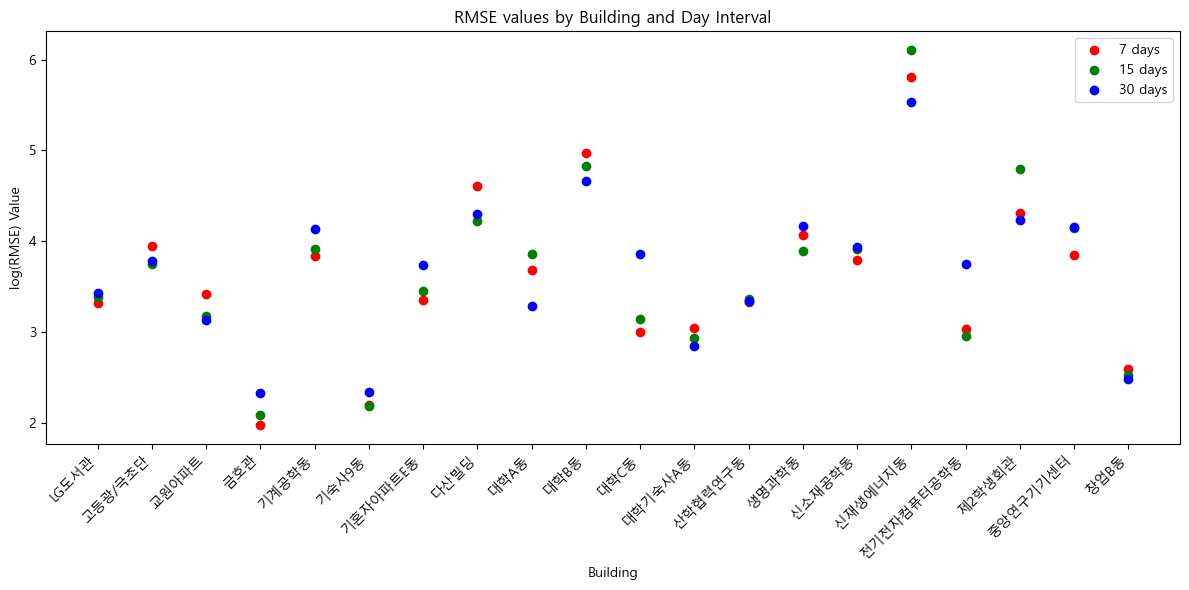

In [74]:
buildings = set()
rmse_values = {7: [], 15: [], 30: []}

for (day, building), metrics in reg_metrics.items():
    if metrics['RMSE'] > 0: 
        buildings.add(building)
        rmse_values[day].append((building, np.log1p(metrics['RMSE'])))  # 로그 변환

buildings = sorted(buildings)

x = range(len(buildings))

plt.figure(figsize=(12, 6))

colors = {7: 'r', 15: 'g', 30: 'b'}
labels = {7: '7 days', 15: '15 days', 30: '30 days'}

for day in [7, 15, 30]:
    buildings_with_positive_rmse = [building for building, rmse in rmse_values[day]]
    rmse_positive = [rmse for building, rmse in rmse_values[day]]
    
    indices = [buildings.index(building) for building in buildings_with_positive_rmse]
    
    plt.scatter(indices, rmse_positive, color=colors[day], label=labels[day])

plt.xticks(x, buildings, rotation=45, ha='right')

plt.title('RMSE values by Building and Day Interval')
plt.xlabel('Building')
plt.ylabel('log(RMSE) Value')

plt.legend()

plt.tight_layout()
plt.show()

# 2023년 8월 31일 예측값 도출

In [84]:
models = {
    7: models_7, 
    15: models_15, 
    30: models_30, 
}

predicted_values = {}

for key, model_dict in models.items():
    for building_name in combined_df_2023.columns:

        look_back = key

        merged_data = df_weather_cleaned_2023.join(combined_df_2023[building_name], how='inner')

        columns = [building_name] + [col for col in merged_data.columns if col != building_name]
        merged_data = merged_data.reindex(columns=columns)

        selected_features = ['기온(°C)','지면온도(°C)','습도(%)']

        selected_df = merged_data[selected_features + [building_name]]

        scaler = MinMaxScaler()

        predict_hours = 24
        new_data = selected_df[-look_back * 24:]
        new_data_scaled = scaler.fit_transform(new_data)

        new_data_scaled = np.reshape(new_data_scaled, (1, look_back * 24, new_data_scaled.shape[1]))

        predicted_usage_scaled = model_dict[building_name].predict(new_data_scaled)
        predicted_usage = scaler.inverse_transform(np.concatenate([np.zeros((predict_hours, scaled_data.shape[1] - 1)), predicted_usage_scaled.reshape(-1, 1)], axis=1))[:, 3]
        key_tuple = (look_back, building_name)
        predicted_values[key_tuple] = predicted_usage

for key, array in predicted_values.items():
    array[array < 0] = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

### 평가지표를 활용한 건물별 모델 선정

In [87]:
best_key = [(7,'LG도서관'),(15,'고등광/극초단'),(30,'교원아파트'),(7,'금호관'),(7,'기계공학동'),
            (15,'기숙사9동'),(7,'기혼자아파트E동'),(15,'다산빌딩'),(30,'대학A동'),(30,'대학B동'),
            (7,'대학C동'),(30,'대학기숙사A동'),(7,'산학협력연구동'),(15,'생명과학동'),(7,'신소재공학동'),
            (30,'신재생에너지동'),(15,'전기전자컴퓨터공학동'),(30,'제2학생회관'),(7,'중앙연구기기센터'),(30,'창업B동')]


predicted_best = {key: predicted_values[key] for key in best_key}

best_dict = {}

for (num, name), array in predicted_best.items():
    if name in best_dict:
        best_dict[name].append(array)
    else:
        best_dict[name] = array

{'LG도서관': array([234.36395397, 225.3560782 , 224.47237794, 218.18023947,
        227.96487962, 242.80779068, 256.91998442, 279.96847202,
        292.80195926, 302.46226673, 316.65312653, 317.87035813,
        324.18134828, 319.67217182, 321.07076411, 315.73311095,
        308.67348229, 305.60778846, 299.00225555, 291.8802986 ,
        281.92297046, 264.59557523, 258.12565413, 244.06701316]),
 '고등광/극초단': array([794.44062216, 781.52449539, 774.08047726, 789.94954674,
        783.21031134, 806.4279236 , 800.73013816, 817.47422893,
        842.12485505, 877.8090457 , 897.23630834, 926.66287777,
        949.27500205, 958.96904235, 963.23426046, 960.43935707,
        928.2330668 , 899.11106079, 878.3634469 , 859.74536376,
        828.35868506, 815.11889789, 796.81548722, 798.76074644]),
 '교원아파트': array([80.15400761, 70.27466216, 64.64562423, 60.41222176, 54.11999104,
        53.83607171, 52.73064111, 54.55923265, 59.64156563, 65.31300977,
        68.99231251, 73.33138587, 75.36487331, 74.922

### 건물별 예측값 시각화

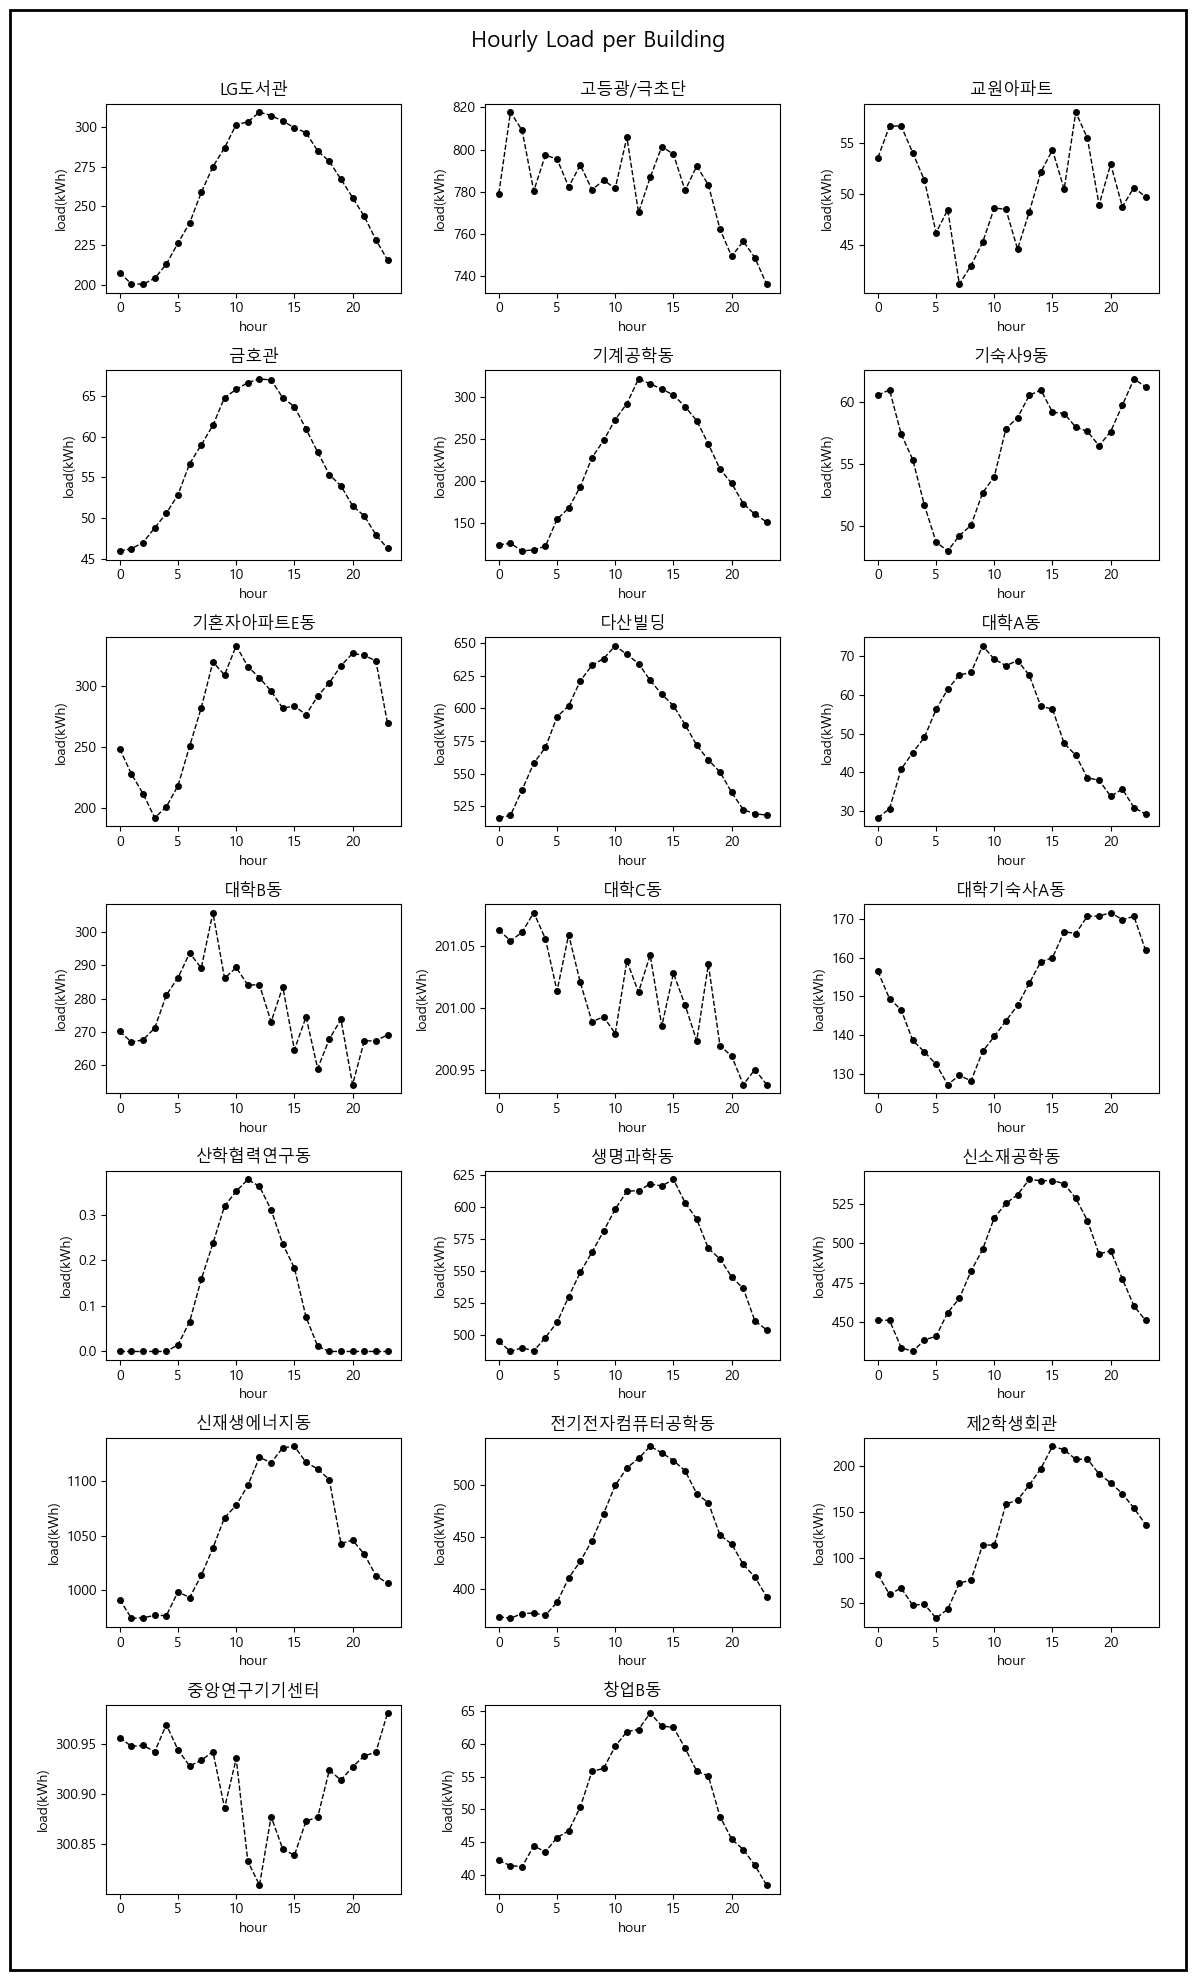

In [112]:
num_buildings = len(best_dict)
cols = 3 
rows = (num_buildings + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(12, 20))

for ax, (building, usage) in zip(axs.flatten(), best_dict.items()):
    ax.plot(usage, marker='o', color='black', linestyle='--', linewidth=1, markersize=4, markerfacecolor='black')
    ax.set_title(building)
    ax.set_xlabel('hour')
    ax.set_ylabel('load(kWh)')

for ax in axs.flatten()[num_buildings:]:
    ax.axis('off')

plt.suptitle('Hourly Load per Building', fontsize=16)

rect = patches.Rectangle((0.01, 0.01), 0.98, 0.98, fill=False, color="black", linewidth=2, transform=fig.transFigure, figure=fig)

fig.patches.append(rect)

plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.98])
plt.show()

### 시간별 총 부하량 시각화

Text(0, 0.5, 'load(kWh)')

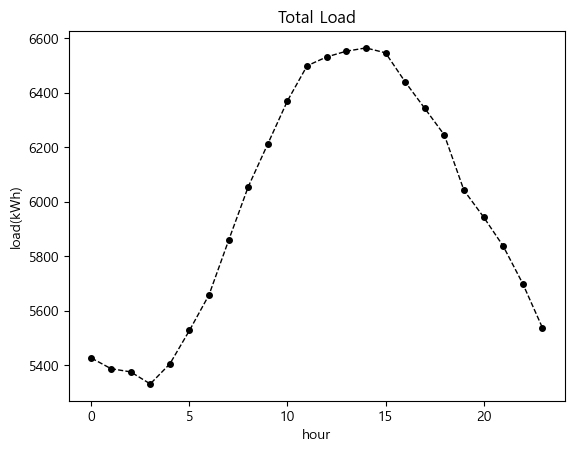

In [122]:
total_load = np.sum(list(best_dict.values()), axis=0)

plt.plot(total_load, marker='o', color='black', linestyle='--', linewidth=1, markersize=4, markerfacecolor='black')
plt.title('Total Load')
plt.xlabel('hour')
plt.ylabel('load(kWh)')

### 예측값 csv파일로 반환

In [128]:
hours = np.arange(24)

combined_data = np.column_stack((hours, total_load))

np.savetxt("LOAD_RESULT.csv", combined_data, delimiter=",", header=",Total Load", comments="", fmt=["%d", "%.2f"])

### 피클파일로 모델 저장

In [28]:
import pickle

with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)